### Helper methods and classes

In [1]:
import numpy as np # linear algebra
import pandas as pd # structured data manipulation
import datetime as dt # data and time operation
import random as rdm # random samples
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

### Rows count from csv file

In [3]:
taxi_data = pd.read_csv('data/yellow_tripdata_2013_jan.csv', memory_map=True, parse_dates=['pickup_datetime', 'dropoff_datetime'])
shape = taxi_data.shape
print(shape)
total_rows = shape[0]

(14776615, 18)


#### yellow_tripdata_2013_jan is big csv file about 2.3 GB of shape (14776615, 18) so we will work on small chunk data set.

In [7]:
#taxi_data = pd.read_csv('data/yellow_tripdata_2013_jan.csv', usecols=['vendor_id'], nrows=100000)
# Load yellow_tripdata_2013_jan taxi trip data
#start = dt.datetime.now()
select = 10000
skip = sorted(rdm.sample(list(np.arange(1, total_rows)),total_rows-1-select))
taxi_data = pd.read_csv('data/yellow_tripdata_2013_jan.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'], skiprows=skip)
#taxi_data.shape
#stop = dt.datetime.now()
#print(stop - start)
taxi_data['duration'] = taxi_data.dropoff_datetime - taxi_data.pickup_datetime
taxi_data['duration'] = taxi_data['duration'].astype('timedelta64[s]')
taxi_data.to_csv('data/chunk_dataset.csv', index=False)
#for chunk in pd.read_csv('data/yellow_tripdata_2013_jan.csv', memory_map=True)

### Read sample csv file to access quickly

In [8]:
taxi_trip_data = pd.read_csv('data/chunk_dataset.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])
print(taxi_trip_data.shape)
print(taxi_trip_data.vendor_id.unique())

(10002, 19)
['VTS' 'CMT']


In [9]:
# sample data visualization
taxi_trip_data.sample(500).head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,duration
9799,CMT,2013-01-26 00:10:42,2013-01-26 00:23:27,1,1.60,-73.990293,40.728973,1,N,-73.989831,40.747174,CSH,9.5,0.5,0.5,0.0,0.0,10.5,765.0
4221,CMT,2013-01-05 11:12:43,2013-01-05 11:26:40,1,2.50,-73.971942,40.760539,1,N,-73.984637,40.729025,CSH,12.0,0.0,0.5,0.0,0.0,12.5,837.0
3189,VTS,2013-01-17 17:50:00,2013-01-17 18:32:00,1,10.01,-73.863560,40.769797,1,NaN,-73.994397,40.741912,CRD,37.0,1.0,0.5,7.6,4.8,50.9,2520.0
1296,VTS,2013-01-06 01:56:00,2013-01-06 02:14:00,1,2.99,-73.987090,40.729565,1,NaN,-73.989512,40.718842,CRD,14.0,0.5,0.5,1.0,0.0,16.0,1080.0
6030,VTS,2013-01-26 21:27:00,2013-01-26 21:31:00,2,0.78,-73.988690,40.760222,1,NaN,-73.989617,40.754800,CSH,5.0,0.5,0.5,0.0,0.0,6.0,240.0


### Dataset Statistics

In [10]:
taxi_trip_data.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,10002.0,1.680164,1.347592,1.000000,1.000000,1.000000,2.000000,6.000000
trip_distance,10002.0,2.759660,3.216177,0.000000,1.000000,1.710000,3.087500,59.280000
pickup_longitude,10002.0,-72.660672,9.783288,-94.116665,-73.991840,-73.981764,-73.966773,0.000000
pickup_latitude,10002.0,40.026973,5.388905,0.000000,40.735294,40.753189,40.767346,48.780847
rate_code,10002.0,1.033993,0.284668,0.000000,1.000000,1.000000,1.000000,5.000000
dropoff_longitude,10002.0,-72.621499,9.914808,-74.341667,-73.991433,-73.980484,-73.963775,0.000000
dropoff_latitude,10002.0,40.007388,5.462986,0.000000,40.734803,40.753751,40.768122,48.780847
fare_amount,10002.0,11.700140,9.587047,2.500000,6.500000,9.000000,13.000000,169.500000
surcharge,10002.0,0.323285,0.368140,0.000000,0.000000,0.000000,0.500000,1.000000
mta_tax,10002.0,0.498350,0.028674,0.000000,0.500000,0.500000,0.500000,0.500000


In [11]:
# Check data for null values
taxi_trip_data.isnull().sum()

vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
rate_code                0
store_and_fwd_flag    4841
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
surcharge                0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
duration                 0
dtype: int64

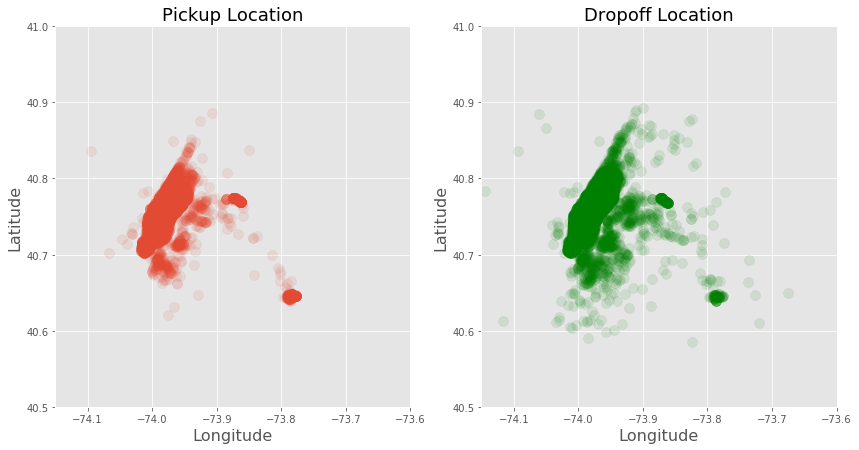

In [12]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(taxi_trip_data.pickup_longitude,taxi_trip_data.pickup_latitude,s=100,alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)

ax2 = fig.add_subplot(122)
ax2.scatter(taxi_trip_data.dropoff_longitude,taxi_trip_data.dropoff_latitude,s=100,color='green',alpha=0.1)
plt.ylim([40.50,41.00])
plt.xlim([-74.15,-73.60])
plt.title('Dropoff Location',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)

plt.show()

### Histogram of distance travelled

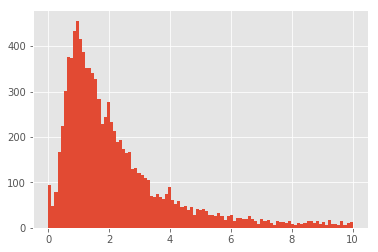

In [13]:
taxi_trip_data.trip_distance.hist(bins = np.linspace(0, 10 ,100))
plt.show()

### Vendor Id proportion

CMT    5162
VTS    4840
Name: vendor_id, dtype: int64


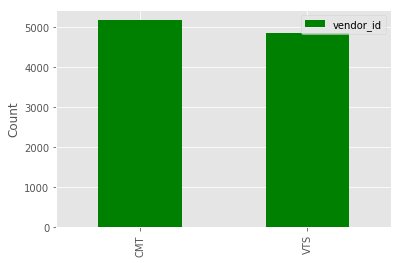

In [14]:
print(taxi_trip_data.vendor_id.value_counts())
pd.DataFrame(taxi_trip_data.vendor_id.value_counts()).plot(kind='bar', color='green')
plt.ylabel('Count')
plt.show()

### Passenger count

1    7158
2    1297
3     417
4     188
5     602
6     340
Name: passenger_count, dtype: int64


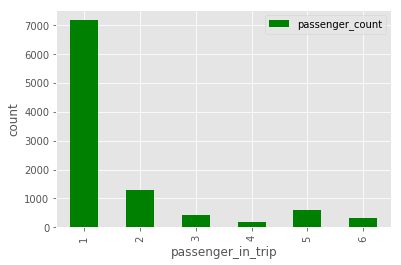

In [15]:
count = taxi_trip_data.passenger_count.value_counts()
count = count.sort_index()
print(count)
pd.DataFrame(count).plot(kind='bar', color='green')
plt.ylabel('count')
plt.xlabel('passenger_in_trip')
plt.show()

### Trip Duration in seconds

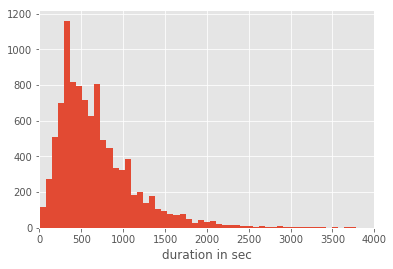

In [16]:
taxi_trip_data['duration'].hist(bins=100)
plt.xlabel('duration in sec')
plt.xlim(0,4000)
plt.show()

In [17]:
# Trip duration equal to zero
print("Short trips:", taxi_trip_data[taxi_trip_data.duration < 10].shape[0])

# Less than zero trip duration
print("Less than zero:", taxi_trip_data[taxi_trip_data.duration < 0].shape[0])

# Trip duration equal to zero
print("Equal to zero:", taxi_trip_data[taxi_trip_data.duration == 0].shape[0])

# Trip duration greater than 10 hours
print("Long trips:", taxi_trip_data[taxi_trip_data.duration > 36000].shape[0])


Short trips: 27
Less than zero: 0
Equal to zero: 15
Long trips: 0


##### Duration less that zero and trips greater than 10 hours (with less fare) are invalid data, short trips may be due to passenger cancelling the ride soon it starts

### Trips per month, per week, per day, per hour

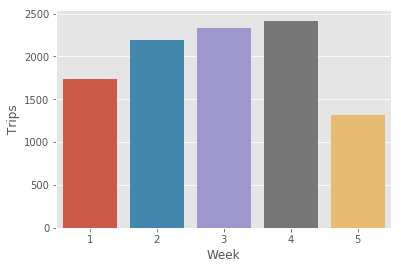

In [18]:
# Trips per week
plt.figure(figsize=(6,4))
ax = sns.countplot(taxi_trip_data.pickup_datetime.dt.week)
ax.set(xlabel='Week', ylabel='Trips')
plt.show()

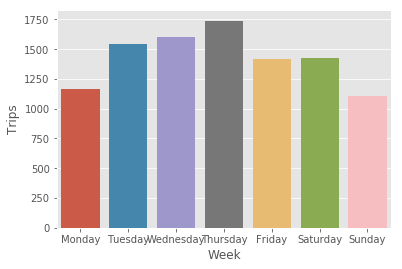

In [19]:
# Trips day of week
plt.figure(figsize=(6,4))
ax = sns.countplot(taxi_trip_data.pickup_datetime.dt.dayofweek)
ax.set(xlabel='Week', ylabel='Trips', xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

#### OBSERVATION: Number of trips increases during weekend

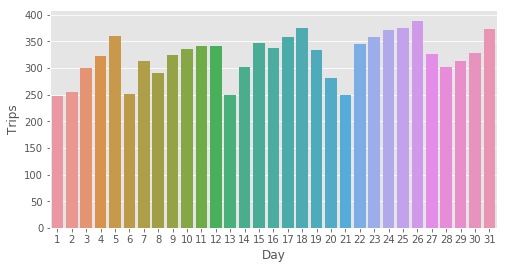

In [20]:
# Trips per day
plt.figure(figsize=(8,4))
ax = sns.countplot(taxi_trip_data.pickup_datetime.dt.day)
ax.set(xlabel='Day', ylabel='Trips')
plt.show()

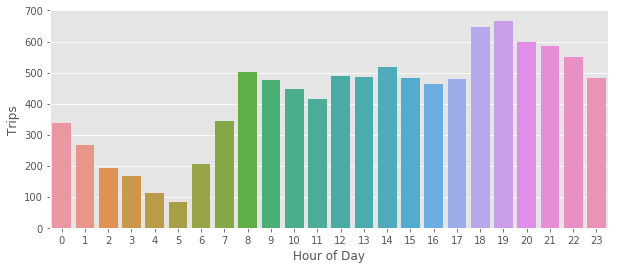

In [21]:
# Trips per hour
plt.figure(figsize=(10,4))
ax = sns.countplot(taxi_trip_data.pickup_datetime.dt.hour)
ax.set(xlabel='Hour of Day', ylabel='Trips')
plt.show()

#### OBSERVATION: Number of trps is maximum in the evening. This is due to office hours.

### Trip Data Correlation function

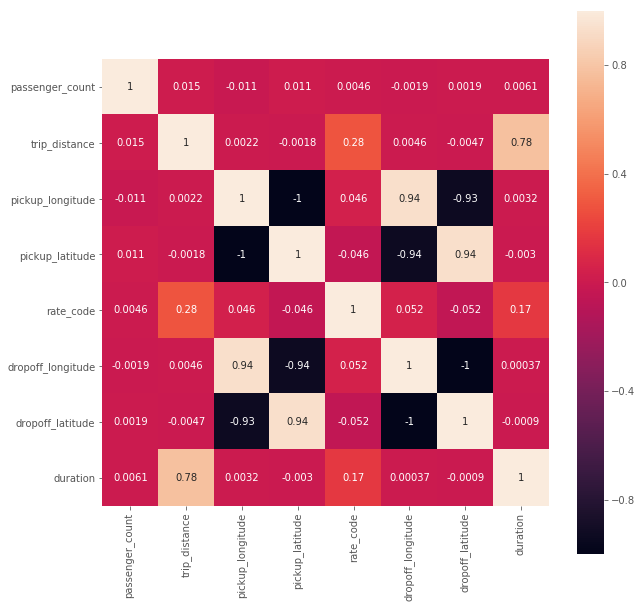

In [22]:
data = taxi_trip_data[['passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude',
                      'rate_code', 'dropoff_longitude', 'dropoff_latitude', 'duration']]
numtrain = data.select_dtypes(include=[np.number])
corr = numtrain.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True,annot=True)
plt.show()

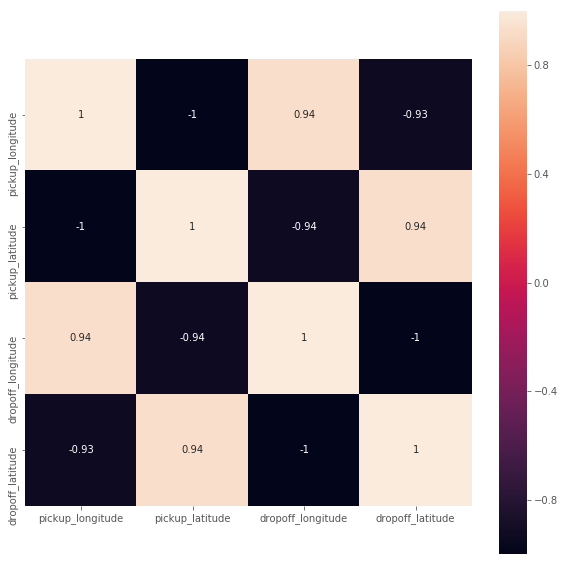

In [23]:
# zooming in on location points correlation
data = taxi_trip_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
# numtrain = data.select_dtypes(include=[np.number])
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True,annot=True)
ax.set(xlabel='Correlation map')
plt.show()

#### OBSERVATION: In dataset, DROP-OFF location(dropoff_lattitde, dropoff_longitude) and PICK-UP (pickup_lattitde, pick_longitude) are highly co-related. This is understandable as drivers pick up next passenger immdiately they drop current one.